<a href="https://colab.research.google.com/github/Yasirkhan26/CS-351L---AI-Lab-GitHub-Repository_2022455/blob/main/Muhammad_Yasir_CS_351L_Lab_08_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 1: Modify the Neural Network**
Iris Dataset Neural Network
The original neural network has been modified by introducing an additional hidden layer with 16 neurons. The updated architecture now consists of:

Input Layer: 4 features from the Iris dataset

First Hidden Layer: 8 neurons with ReLU activation

New Hidden Layer: 16 neurons with ReLU activation

Third Hidden Layer: 8 neurons with ReLU activation

Output Layer: 3 neurons with softmax activation (one for each Iris class)

Purpose of the Modification
The additional layer was introduced to:

Increase the network's capacity to learn complex, non-linear relationships.

Potentially capture more intricate patterns in the data.

Explore how additional complexity might impact model performance.

It also conatins the modified neural network with updated layers.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Preprocess the data
encoder = LabelBinarizer()
y_encoded = encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# Modified Neural Network with an additional hidden layer
modified_model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],), name="Hidden_Layer_1"),
    Dense(16, activation='relu', name="Hidden_Layer_2"),  # New layer with 16 neurons
    Dense(8, activation='relu', name="Hidden_Layer_3"),  # Original second layer now becomes third
    Dense(y_train.shape[1], activation='softmax', name="Output_Layer")
])

# Compile the model
modified_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Display model summary
modified_model.summary()

Training samples: 105, Testing samples: 45


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)               │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_2 (Dense)               │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_3 (Dense)               │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 347 (1.36 KB)

 Trainable params: 347 (1.36 KB)

 Non-trainable params: 0 (0.00 B)

**Step 3 and 4: Train and evaluating the Neural Network**

Evaluate the model on the test data and visualize the confusion matrix.
Visualize the training progress using loss and accuracy plots.

In [ ]:
# Train the modified model
modified_history = modified_model.fit(
    X_train, y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=8,
    verbose=1
)

# Visualize training history
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(modified_history.history['loss'], label='Training Loss')
plt.plot(modified_history.history['val_loss'], label='Validation Loss')
plt.title('Modified Model: Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(modified_history.history['accuracy'], label='Training Accuracy')
plt.plot(modified_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Modified Model: Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the modified model
test_loss, test_accuracy = modified_model.evaluate(X_test, y_test, verbose=0)
print(f"Modified Model - Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Generate predictions
y_pred = modified_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Print classification report
print("Modified Model - Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_true_classes, y_pred_classes, display_labels=target_names, cmap="Blues")
plt.title("Modified Model: Confusion Matrix")
plt.show()

# **Example 2 Wine dataset **

All steps would be repeated as above except a few changes.

Loading the libraries
Loading the dataset
Building,training and testing the neural network

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)               │ (None, 8)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_2 (Dense)               │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 307 (1.20 KB)

 Trainable params: 307 (1.20 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3848 - loss: 1.0406 - val_accuracy: 0.4000 - val_loss: 0.9930
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4758 - loss: 0.9389 - val_accuracy: 0.5600 - val_loss: 0.8942
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5877 - loss: 0.8640 - val_accuracy: 0.5600 - val_loss: 0.8136
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5981 - loss: 0.8020 - val_accuracy: 0.6400 - val_loss: 0.7434
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6561 - loss: 0.7458 - val_accuracy: 0.8400 - val_loss: 0.6781
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7376 - loss: 0.6919 - val_accuracy: 0.9200 - val_loss: 0.6154
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8648 - loss: 0.6380 - val_accuracy: 1.0000 - val_loss: 0.5548
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9196 - loss: 0.5839 - val_accuracy: 1.0000 - val_loss

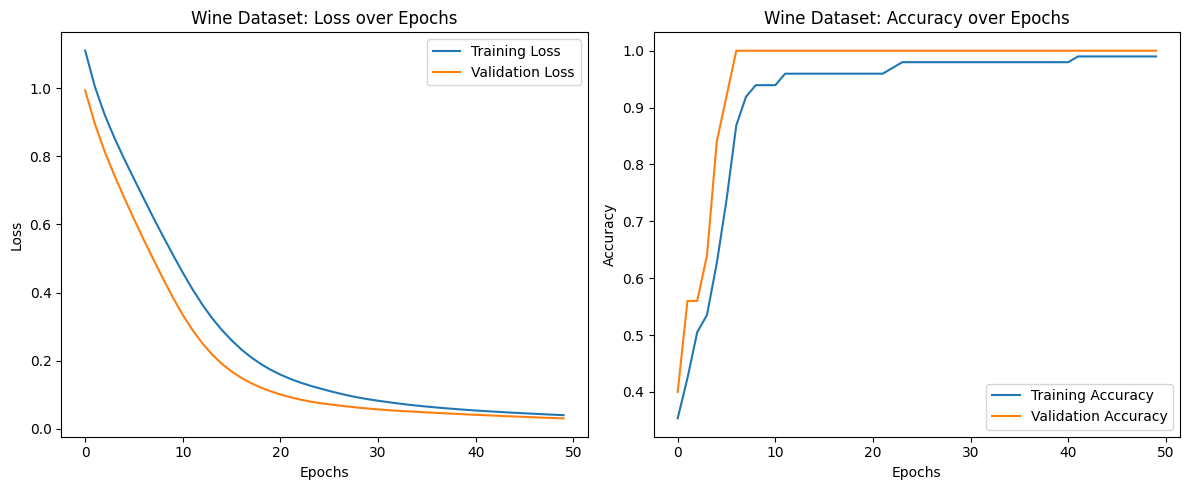

Wine Dataset - Test Loss: 0.0437, Test Accuracy: 1.0000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Wine Dataset - Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



<Figure size 800x600 with 0 Axes>

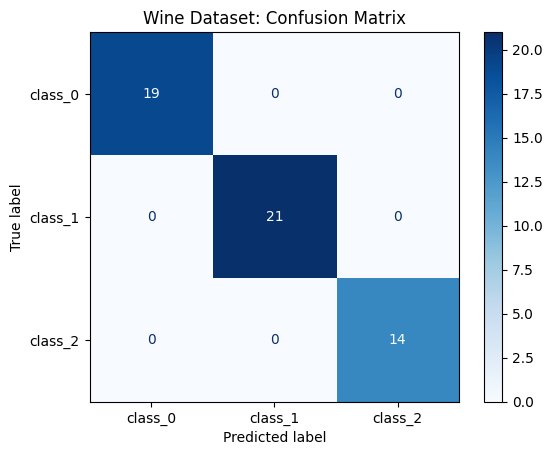

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load Wine dataset
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
y = wine.target
target_names = wine.target_names

# Preprocess the data
encoder = LabelBinarizer()
y_encoded = encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Wine Dataset Neural Network
wine_model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],), name="Hidden_Layer_1"),
    Dense(16, activation='relu', name="Hidden_Layer_2"),
    Dense(y_train.shape[1], activation='softmax', name="Output_Layer")
])

# Compile the model
wine_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Display model summary
wine_model.summary()

# Train the model
wine_history = wine_model.fit(
    X_train, y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=8,
    verbose=1
)

# Visualize training history
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(wine_history.history['loss'], label='Training Loss')
plt.plot(wine_history.history['val_loss'], label='Validation Loss')
plt.title('Wine Dataset: Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(wine_history.history['accuracy'], label='Training Accuracy')
plt.plot(wine_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Wine Dataset: Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model
test_loss, test_accuracy = wine_model.evaluate(X_test, y_test, verbose=0)
print(f"Wine Dataset - Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Generate predictions
y_pred = wine_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Print classification report
print("Wine Dataset - Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_true_classes, y_pred_classes, display_labels=target_names, cmap="Blues")
plt.title("Wine Dataset: Confusion Matrix")
plt.show()